In [44]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt



In [28]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [29]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [30]:
# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

plot

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [31]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_market_data)


In [32]:
# Create a DataFrame with the scaled data
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)
# Copy the crypto names from the original data
coins = list(df_market_data.index)
coins
# Set the coinid column as index
df_normalized['coin_id'] = coins 
coin_df = df_normalized.set_index('coin_id') 
# Display sample data
coin_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [36]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(coin_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(k_model.inertia_)


In [40]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_curve)

elbow_df

,k_values,inertia_values
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


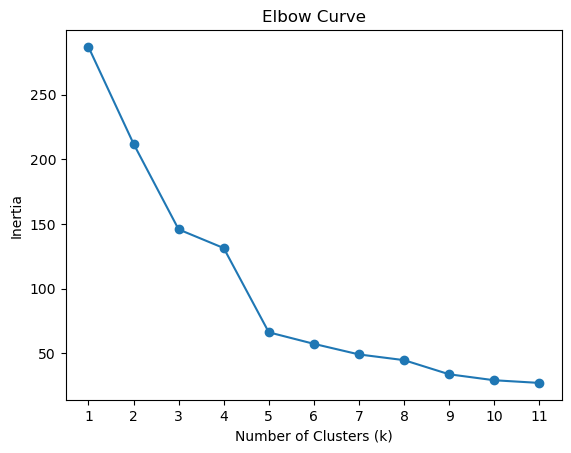

In [46]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k_values'])
plt.grid(False)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The point at which the curve begins to flatten, which is `K = 4`.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [49]:
# Initialize the K-Means model using the best value for k
best_k_model = KMeans(n_clusters=4, random_state=1, n_init='auto')

In [50]:
# Fit the K-Means model using the scaled data
best_k_model.fit(coin_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [51]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = best_k_model.predict(coin_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[1 1 2 2 1 1 1 1 2 2 0 2 2 1 2 2 2 2 1 2 0 1 2 2 2 2 2 0 1 2 2 2 3 2 0 0 1
 0 2 2 0]


In [52]:
# Create a copy of the DataFrame
predicted_clusters_df = coin_df.copy()

In [54]:
# Add a new column to the DataFrame with the predicted clusters
predicted_clusters_df['Cluster'] = predicted_clusters

# Display sample data
predicted_clusters_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [61]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = predicted_clusters_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    cmap='Category10',
    width=800,
    height=600,
    title='Cryptocurrency Clusters',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)'
)
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [65]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [68]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca_model.fit_transform(coin_df)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [69]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print("Explained Variance for each Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")

Explained Variance for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


In [71]:
total_explained_variance = sum(explained_variance)
print(f"Total Explained Variance of the three principal components: {total_explained_variance:.4f}")


Total Explained Variance of the three principal components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895

In [87]:
# Create a new DataFrame with the PCA data.
cluster_pca_df = pd.DataFrame(
    pca_components,
    columns = ["PCA1", "PCA2", "PCA3"]
)
# Copy the crypto names from the original data
cluster_pca_df['coin_id'] = list(predicted_clusters_df.index)
cluster_pca_df

# Set the coinid column as index
cluster_pca_df = cluster_pca_df.set_index('coin_id')

# Display sample data
cluster_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [89]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [94]:
df_market_data_pca = cluster_pca_df.copy()

In [95]:
# Create an empty list to store the inertia values
new_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(df_market_data_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    new_inertia_values.append(k_model.inertia_)

In [96]:
# Create a dictionary with the data to plot the Elbow curve
new_elbow_data = {
    'k_values': k_values,
    'inertia_values': new_inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
new_elbow_df = pd.DataFrame(new_elbow_data)

new_elbow_df.head()


,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217


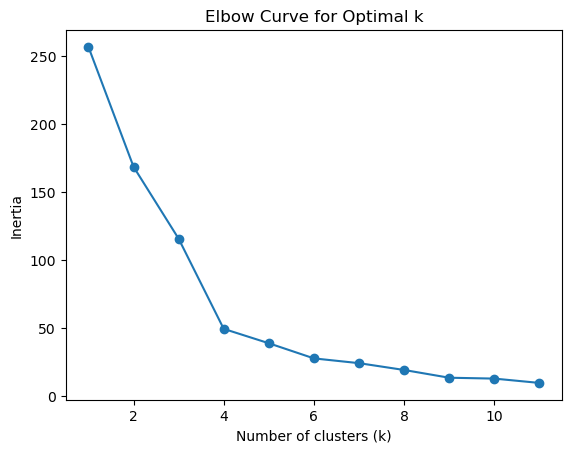

In [107]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values, new_inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is `K = 4`, because that is the point at which inertia slows and the plot begins to flatten


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The K value is more clearly `K = 4` in the PCA Data, but the answer is the same. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [98]:
# Initialize the K-Means model using the best value for k
best_k_model = KMeans(n_clusters=4, random_state=1, n_init='auto')


In [100]:
# Fit the K-Means model using the PCA data
best_k_model.fit(cluster_pca_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [101]:
# Predict the clusters to group the cryptocurrencies using the PCA data
best_k_predicted_clusters = best_k_model.predict(cluster_pca_df)

# Print the resulting array of cluster values.
best_k_predicted_clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [104]:
# Create a copy of the DataFrame with the PCA data
copy_cluster_pca_df = cluster_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_cluster_pca_df['Predicted Clusters'] = best_k_predicted_clusters

# Display sample data
copy_cluster_pca_df.head()

,PCA1,PCA2,PCA3,Predicted Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [106]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
best_k_scatter_plot = copy_cluster_pca_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='Predicted Clusters',
    hover_cols=['coin_id'],
    title='PCA Scatter Plot with Predicted Clusters',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)

best_k_scatter_plot


:NdOverlay   [Predicted Clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

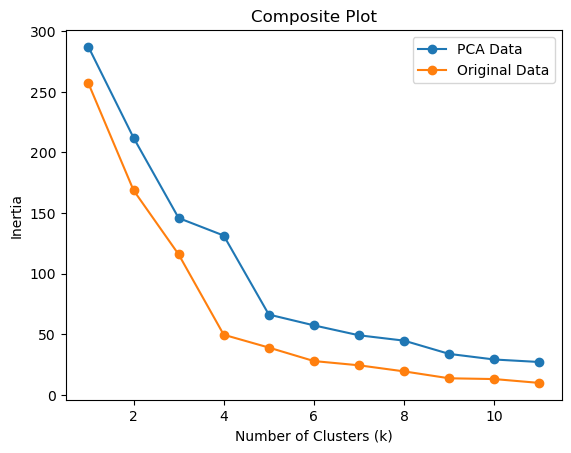

In [111]:
# Composite plot to contrast the Elbow curves


# Plot the first elbow curve
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', label='PCA Data')

# Plot the second elbow curve
plt.plot(k_values, new_inertia_values, marker='o', linestyle='-', label='Original Data')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Composite Plot')
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [112]:
# Composite plot to contrast the clusters

# Create a scatter plot using hvPlot for the original data
scatter_original_data = predicted_clusters_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    cmap='Category10',
    width=800,
    height=600,
    title='Cryptocurrency Clusters',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)'
)

# Create a scatter plot using hvPlot for the PCA-transformed data
scatter_pca_data = copy_cluster_pca_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='Predicted Clusters',
    hover_cols=['coin_id'],
    cmap='Category10',
    width=800,
    height=600,
    title='PCA Scatter Plot with Predicted Clusters',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)

# Combine both scatter plots
combined_scatter_plot = scatter_original_data * scatter_pca_data

# Display the combined scatter plot
combined_scatter_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Predicted Clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using K-Means simplifies the data and makes it easier to understand visually.